<a href="https://colab.research.google.com/github/brenda1602/DL_TensorFlow/blob/master/Regress%C3%A3o_4_Previs%C3%A3o_do_pre%C3%A7o_de_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão no preço de casas


##1. Biblioteca e dados


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

In [ ]:
house= pd.read_csv('/content/kc-house-data.csv', encoding = 'ISO-8859-1')



##2. Limpeza dos dados


In [ ]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

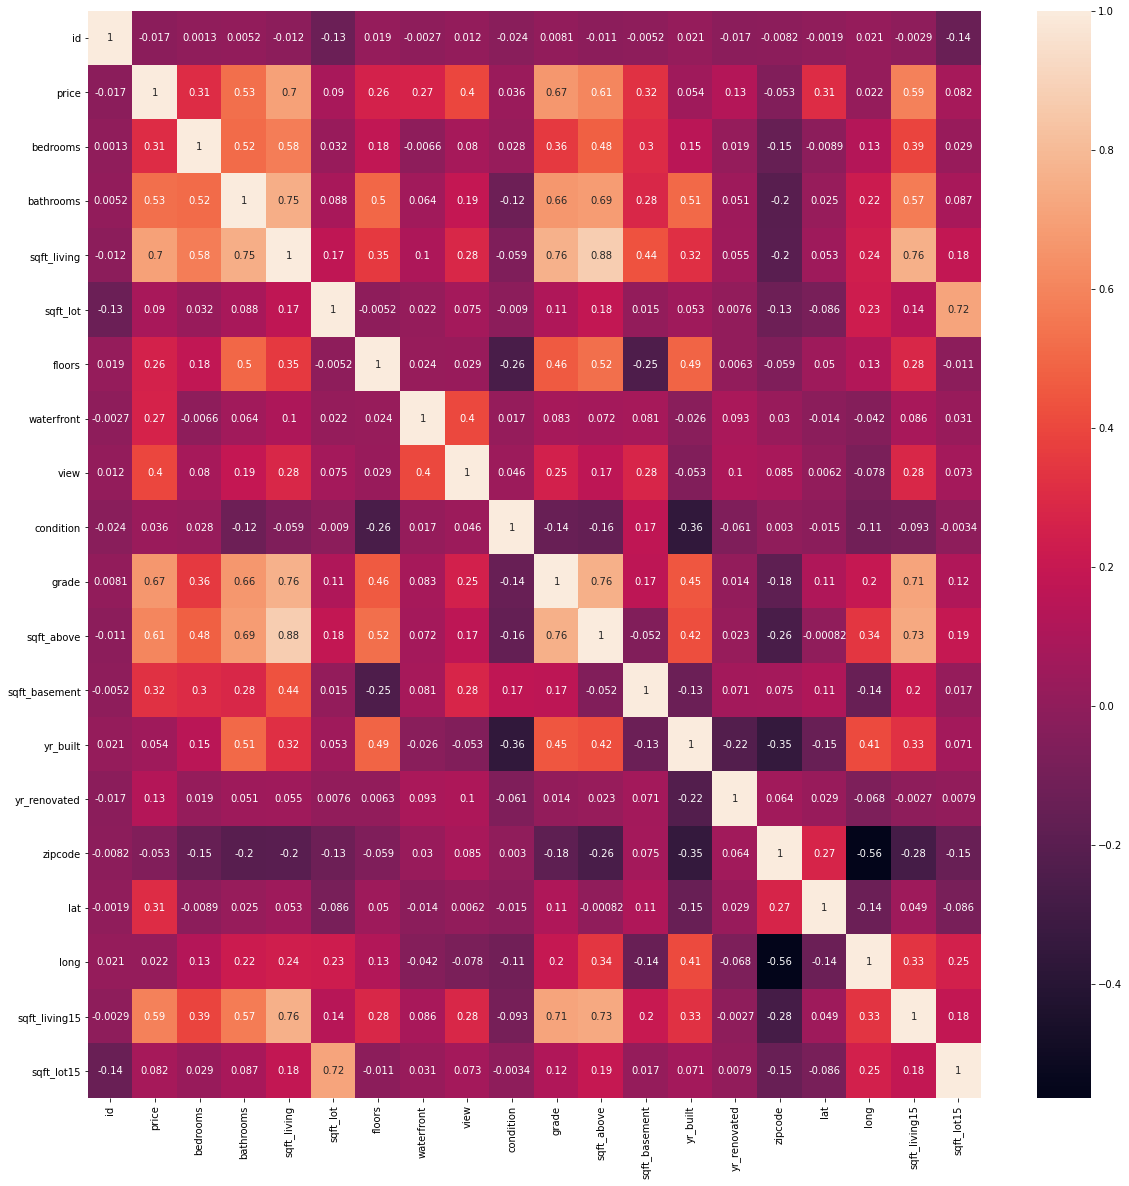

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house.corr(), annot = True);


In [ ]:
house.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
selected= [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement' ]

In [ ]:
X= house[selected]

In [ ]:
X.shape

(21613, 7)

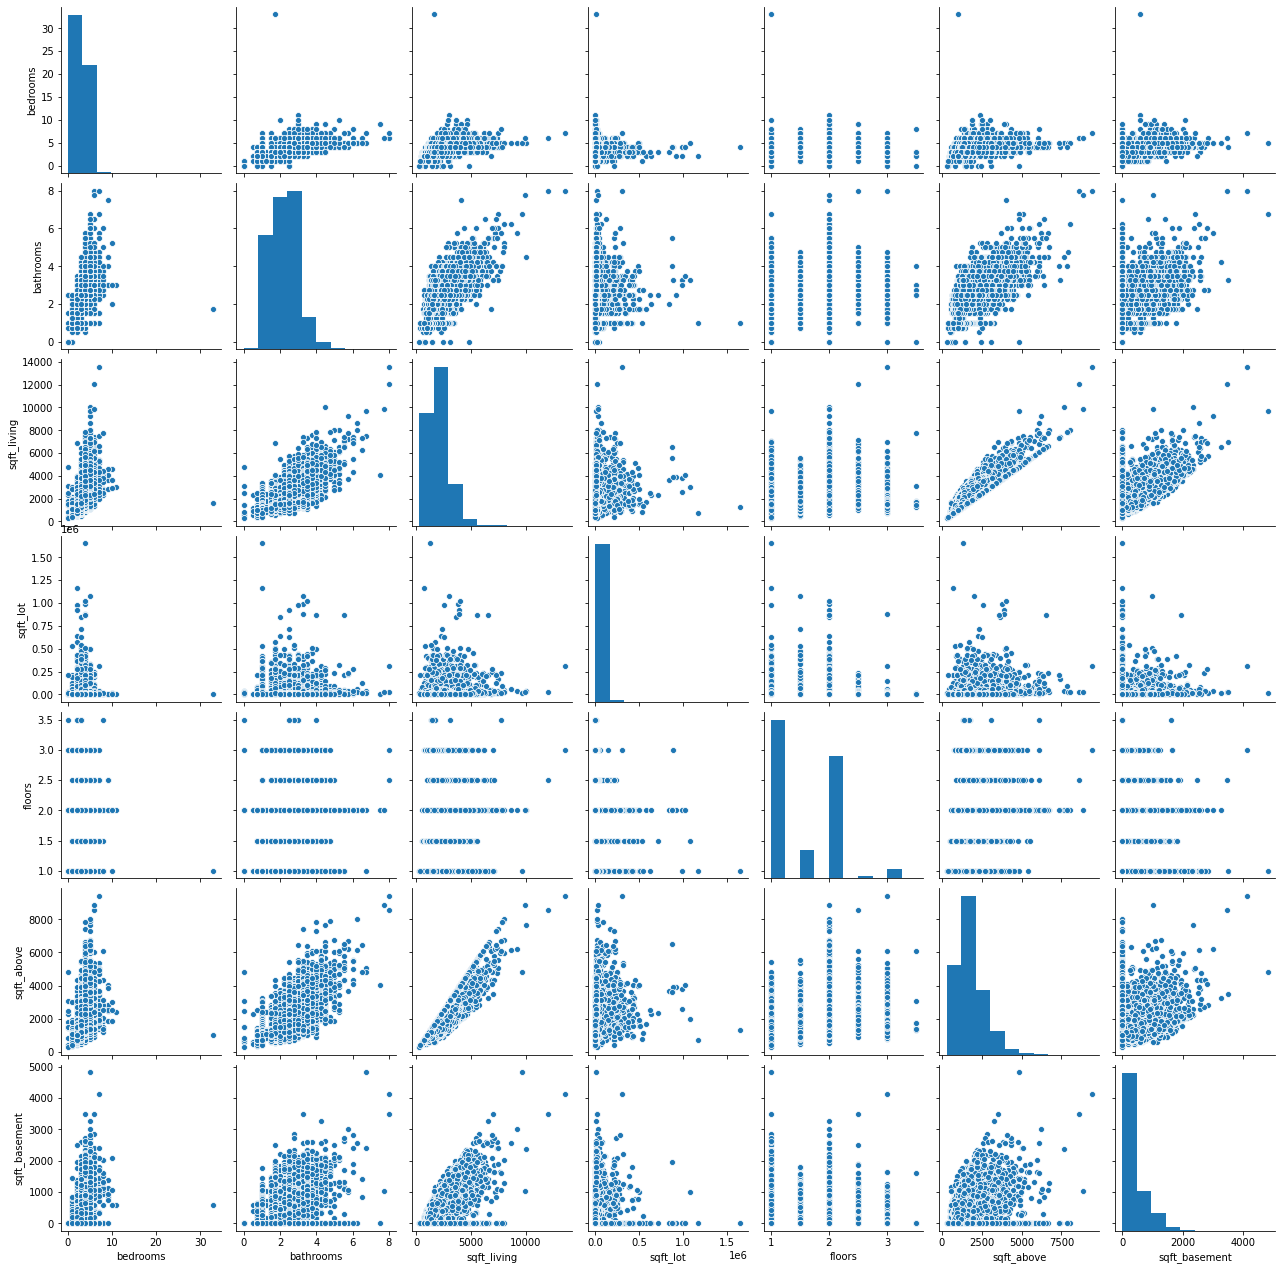

In [ ]:
sns.pairplot(X)

In [ ]:
Y=house['price'];


In [ ]:
Y.shape

(21613,)

###dividir a base de dado em teste e treinamento 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
Y = Y.values.reshape(-1,1)

In [ ]:

Y_scaled = scaler.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_scaled,Y_scaled,test_size=0.25)

## Criação do modelo

In [ ]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_split=0.2)


Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 9.9114e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 9.8843e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 9.8464e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.9022e-04
Epoch 10/100
260/260 [==============================] - 1s 3ms/step - loss:

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

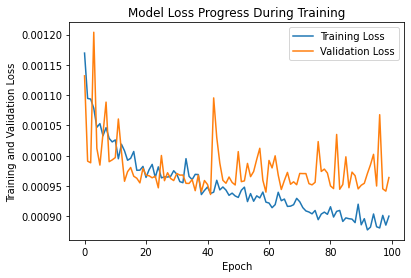

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

##Teste do modelo


 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'

In [ ]:
X_teste_1=np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

In [ ]:
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_teste_1)

In [ ]:
Y_predict_1= model.predict(X_test_scaled_1)


In [ ]:

Y_predict_1 = scaler.inverse_transform(Y_predict_1)
Y_predict_1

array([[177012.52]], dtype=float32)

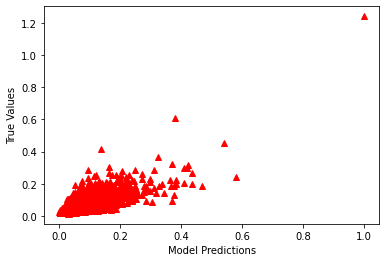

In [ ]:
Y_predict = model.predict(X_test)
plt.plot(Y_test, Y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

### Calcular o erro


In [ ]:
y_predict_orig=scaler.inverse_transform(Y_predict)
y_test_orig= scaler.inverse_transform(Y_test)
n=len(X_test)
k=(X_test.shape[1])
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE= float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE= mean_squared_error(y_test_orig,y_predict_orig)
MAE=mean_absolute_error(y_test_orig, y_predict_orig)
r2= r2_score(y_test_orig, y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
print(r2, adj_r2)


0.5691579859975223 0.5685990730809142


##Aumentar as caracteristicas 
###Para diminuir o erro


In [ ]:
selected= [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement','waterfront', 'view','condition','grade', 'sqft_above', 'yr_built', 'yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15']

In [ ]:
X_2=house[selected]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_scaled_2=scaler.fit_transform(X_2)


In [ ]:
Y_2=house['price']

In [ ]:
Y_2 = Y_2.values.reshape(-1,1)
Y_scaled_2 = scaler.fit_transform(Y_2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2,Y_test_2=train_test_split(X_scaled_2,Y_scaled_2,test_size=0.25)

In [ ]:
X_train_2.shape

(16209, 19)

In [ ]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')


In [ ]:
epochs_hist=model.fit(X_train_2,Y_train_2, epochs=100,batch_size=50, validation_split=0.2)


Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 1.2812e-04 - val_loss: 3.0383e-04
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 1.1931e-04 - val_loss: 2.9276e-04
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 1.4366e-04 - val_loss: 2.9754e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 1.4952e-04 - val_loss: 3.1303e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 1.3386e-04 - val_loss: 2.9823e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 1.1909e-04 - val_loss: 3.0972e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 1.2684e-04 - val_loss: 3.0986e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 1.1642e-04 - val_loss: 3.1147e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 1.1995e-04 - val_loss: 3.5603e-04
Epoch 10/100
260/26

In [ ]:
Y_predict_2 = model.predict(X_test_2)

In [ ]:
y_predict_orig_2=scaler.inverse_transform(Y_predict_2)
y_test_orig_2= scaler.inverse_transform(Y_test_2)
n=len(X_test)
k=(X_test.shape[1])
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE= float(format(np.sqrt(mean_squared_error(y_test_orig_2, y_predict_orig_2)), '.3f'))
MSE= mean_squared_error(y_test_orig_2,y_predict_orig_2)
MAE=mean_absolute_error(y_test_orig_2, y_predict_orig_2)
r2= r2_score(y_test_orig_2, y_predict_orig_2)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
print(r2, adj_r2)

0.8457339487383254 0.8455338259883566
